In [30]:
import gym
import random
import warnings
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
from tqdm import tqdm

warnings.filterwarnings(action='ignore')

In [2]:
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env


랜덤 행동 에이전트의 환경 실행 결과 확인

In [15]:
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score += reward
    step += 1
    if done:
        break

env.close()
show_video()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.9086
[-182.0, -196.0, -180.0, -166.0, -186.0, -188.0, -186.0, -184.0, -184.0, -178.0, -172.0, -168.0, -168.0, -196.0, -178.0, -172.0, -180.0, -178.0, -158.0, -182.0, -182.0, -192.0, -170.0, -196.0, -162.0, -184.0, -190.0, -192.0, -176.0, -178.0, -186.0, -174.0, -190.0, -184.0, -172.0, -178.0, -194.0, -176.0, -184.0, -182.0, -178.0, -170.0, -170.0, -190.0, -190.0, -192.0, -174.0]


<AxesSubplot:ylabel='Density'>

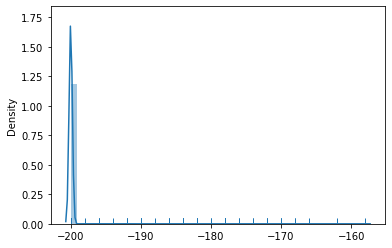

In [3]:
# 10.5 성공적인 에피소드 저장
env = gym.make('MountainCar-v0')

scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    while True:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        
        score += reward
        
        if done:
            break
        
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

훈련 데이터 만들기

In [14]:
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)

분류 신경망 정의 및 학습

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_X, train_Y, epochs=30, batch_size=16, validation_split=0.25)

Epoch 1/30
439/439 [==============================] - 5s 2ms/step - loss: 1.0982 - accuracy: 0.3512 - val_loss: 1.0970 - val_accuracy: 0.3493
Epoch 2/30
439/439 [==============================] - 1s 2ms/step - loss: 1.0978 - accuracy: 0.3526 - val_loss: 1.0957 - val_accuracy: 0.3476
Epoch 3/30
439/439 [==============================] - 1s 2ms/step - loss: 1.0957 - accuracy: 0.3647 - val_loss: 1.0953 - val_accuracy: 0.3805
Epoch 4/30
439/439 [==============================] - 1s 2ms/step - loss: 1.0932 - accuracy: 0.3788 - val_loss: 1.0904 - val_accuracy: 0.3942
Epoch 5/30
439/439 [==============================] - 1s 2ms/step - loss: 1.0907 - accuracy: 0.3855 - val_loss: 1.0883 - val_accuracy: 0.4019
Epoch 6/30
439/439 [==============================] - 1s 2ms/step - loss: 1.0885 - accuracy: 0.3914 - val_loss: 1.0914 - val_accuracy: 0.3698
Epoch 7/30
439/439 [==============================] - 1s 2ms/step - loss: 1.0888 - accuracy: 0.3921 - val_loss: 1.0874 - val_accuracy: 0.3997
Epoch 

학습 결과 확인

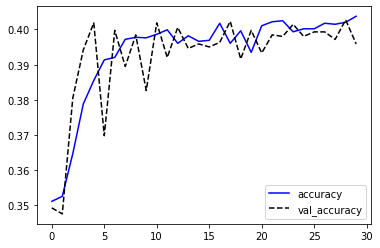

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend()
plt.show()

분류 신경망으로 에이전트 행동 확인

In [32]:
scores = []
steps = []
actions = []
for i in tqdm(range(500)):
    score = 0
    step = 0
    previous_obs = []
    env.reset()
    
    while True:
        if len(previous_obs) == 0:
            action = env.action_space.sample()
        else:
            logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            action = np.argmax(logit)
            actions.append(action)
            
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1
        
        if done:
            break
            
    scores.append(score)
    steps.append(step)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [28:31<00:00,  3.42s/it]


-134.168


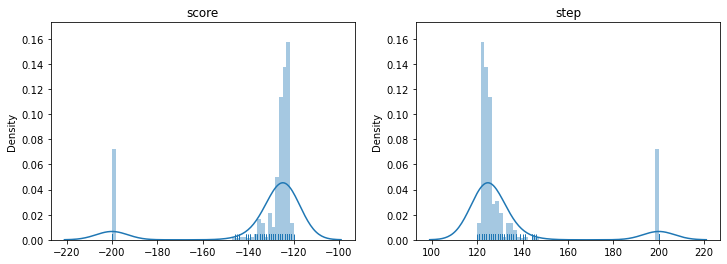

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])
print(np.mean(scores))

<AxesSubplot:ylabel='Density'>

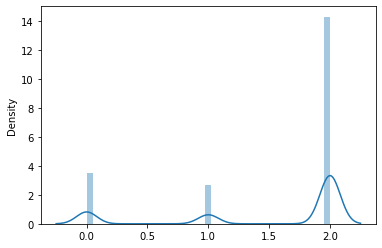

In [36]:
sns.distplot(actions)

에이전트 실행 결과 확인

In [37]:
env.close()
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
        action = np.argmax(logit)
        
    obs,reward,done,info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break
        
print('score:', score)
print('step:', step)
env.close()
show_video()
    

score: -126.0
step: 126
